In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(parent_dir, 'data')
models_dir = os.path.join(parent_dir, 'models')
print('working directory: ', os.getcwd())
print('data directory:    ', data_dir, )
print('models directory:  ', models_dir)

working directory:  C:\Users\Joni\Dropbox (Privat)\CODE\InformationSystemsWS1718\notebooks
data directory:     C:\Users\Joni\Dropbox (Privat)\CODE\InformationSystemsWS1718\data
models directory:   C:\Users\Joni\Dropbox (Privat)\CODE\InformationSystemsWS1718\models


In [3]:
data_candidates = pd.read_csv(os.path.join(data_dir, 'fb_election_data_28112017.csv'))
data_candidates = data_candidates[['id', 'from_name', 'message', 'Partei_ABK']] # drop other columns
#data_party['message'] = data_party['message'].astype(str)

In [19]:
party_names = {'AfD': 'AfD',
               'DIE LINKE': 'DIE LINKE',
               'BÜNDNIS 90/DIE GRÜNEN': 'GRÜNE',
               'CSU (Christlich-Soziale Union)': 'CSU',
               'CDU': 'CDU',
               'FDP': 'FDP',
               'SPD': 'SPD'}
data_parties =  pd.read_csv((os.path.join(data_dir, 'party_data.csv')))
#data_parties.rename(columns={'from_id': 'id'}, inplace=True)
data_parties['Partei_ABK'] = data_parties['from_name'].map(party_names)
data_parties['from_name'] = data_parties['Partei_ABK'] + ' Party'
data_parties = data_parties[['id', 'from_name', 'message', 'Partei_ABK']] # drop other columns

In [20]:
data = data_candidates.append(data_parties)
data = data[data['message'].notnull()]
data.index = pd.Index(range(len(data)))  # make sure the index are unique increasing numbers
#data.to_pickle(os.path.join(data_dir, 'data_clean_4cols.pickle'))

In [77]:
data = pd.read_pickle(os.path.join(data_dir, 'data_clean_4cols.pickle'))

In [21]:
data_parties.tail()

,id,from_name,message,Partei_ABK
3542,47694585682_10154634091850683,DIE LINKE Party,Zwei Tage vor der Bundestagswahl sind wir im W...,DIE LINKE
3543,47694585682_10154636553235683,DIE LINKE Party,"Pascal Meiser, unser Direktkandidat in Berlin ...",DIE LINKE
3544,47694585682_10154636607885683,DIE LINKE Party,Zu Gast im Wahlquartier-Talk war Stefan Liebic...,DIE LINKE
3545,47694585682_10154636952725683,DIE LINKE Party,Sahra Wagenknecht: Ihre Stimme am 24. Septembe...,DIE LINKE
3546,47694585682_10154636960630683,DIE LINKE Party,Dietmar Bartsch: »Am Sonntag haben wir die Cha...,DIE LINKE


In [6]:
data['word_count'] = data['message'].str.count(' ') + 1

In [59]:
leaders = ['Sahra Wagenknecht',
'Dietmar Bartsch',
'Katrin Göring-Eckardt',
'Cem Özdemir',
'Martin Schulz',
'Angela Merkel',
'Joachim Herrmann',
'Alexander Gauland',
'Alice Weidel']
data['leader'] = data['from_name'].isin(leaders)
leader_data = data[data['leader']]

In [112]:
candidate_summary = pd.DataFrame()
candidate_summary = (data
                  .drop(['id', 'message', 'word_count'], axis=1)
                  .drop_duplicates('from_name')
                  .set_index('from_name'))
candidate_summary['mean_word_count'] = data.groupby('from_name')['word_count'].mean()
candidate_summary['median_word_count'] = data.groupby('from_name')['word_count'].median()
candidate_summary['post_count'] = data['from_name'].value_counts()
candidate_summary['total words'] =  data.groupby('from_name')['word_count'].sum()
candidate_summary.shape

(1001, 6)

In [113]:
candidate_summary[candidate_summary['leader']].sort_values('Partei_ABK')
#candidate_data.sort_values('post_count', ascending=False)

,Partei_ABK,leader,mean_word_count,median_word_count,post_count,total words
from_name,,,,,,
Alice Weidel,AfD,True,72.130221,40.0,407,29357
Angela Merkel,CDU,True,49.910638,43.0,235,11729
Joachim Herrmann,CSU,True,36.069606,20.0,431,15546
Dietmar Bartsch,DIE LINKE,True,75.688761,64.0,347,26264
Sahra Wagenknecht,DIE LINKE,True,99.632836,88.0,335,33377
Katrin Göring-Eckardt,GRÜNE,True,42.662116,38.0,293,12500
Cem Özdemir,GRÜNE,True,37.789625,25.0,347,13113
Martin Schulz,SPD,True,64.505181,50.0,386,24899


In [114]:
party_summary = pd.DataFrame()
party_summary['mean_word_count'] = data.groupby('Partei_ABK')['word_count'].mean()
party_summary['post_count'] = data['Partei_ABK'].value_counts()
party_summary['candidate_count'] = candidate_summary['Partei_ABK'].value_counts()
party_summary['posts_per_candidate'] = party_summary['post_count'] / party_summary['candidate_count']

In [115]:
party_summary

,mean_word_count,post_count,candidate_count,posts_per_candidate
Partei_ABK,,,,
AfD,68.173439,16340,123,132.845528
CDU,43.353218,39242,208,188.663462
CSU,37.378655,7627,45,169.488889
DIE LINKE,62.494820,16024,110,145.672727
FDP,35.287935,21293,172,123.796512
GRÜNE,39.506401,14451,94,153.734043
SPD,40.526667,58986,249,236.891566


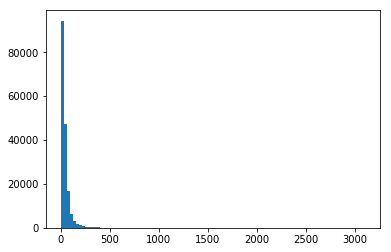

In [90]:
plt.figure()
n, bins, patches = plt.hist(x=data['word_count'], bins=100)
plt.show()

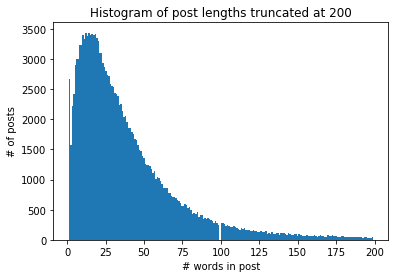

In [101]:
plt.figure()
n, bins, patches = plt.hist(x=data['word_count'][data['word_count']<200], bins=200)
plt.xlabel('# words in post')
plt.ylabel('# of posts')
plt.title('Histogram of post lengths truncated at 200')
plt.show()

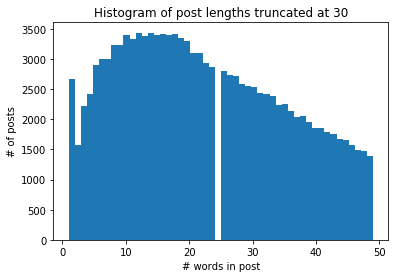

In [103]:
plt.figure()
n, bins, patches = plt.hist(x=data['word_count'][data['word_count']<50], bins=50)
plt.xlabel('# words in post')
plt.ylabel('# of posts')
plt.title('Histogram of post lengths truncated at 30')
plt.show()